In [129]:
!pip3 install sklearn

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [131]:
# Import the data to use it for machine learning

#read csv file
data = "Enrollment_publicVSPrivate_1965-2026.csv"
df = pd.read_csv(data, encoding = "ISO-8859-1")
df


,Year,Public,Private
0,2026,16.64,5.99
1,2025,16.54,5.96
2,2024,16.41,5.93
3,2023,16.25,5.87
4,2022,16.08,5.81
5,2021,15.91,5.75
6,2020,15.68,5.66
7,2019,15.44,5.57
8,2018,15.21,5.48
9,2017,15.00,5.41


In [132]:
# Historical data was until 2015. For machine learning, use up to 2015 data. Drop the projected data
df1=df.drop(df.index[:11])

In [133]:
# X = df1["Year"]
# y = df1["Public"]

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
X = df1.Year.values.reshape(-1, 1)
y = df1.Public.values.reshape(-1, 1)

In [136]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [137]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 0.19261629]]
y-axis intercept:  [-372.83288688]


In [138]:
predictions = model.predict(X)
print(f"True output: {y[0]}, Predicted output: {predictions[0]}, Prediction Error: {predictions[0]-y[0]}")

True output: [ 14.57], Predicted output: [ 15.28893665], Prediction Error: [ 0.71893665]


In [139]:
x_min = X.min()
x_max = X.max()

In [140]:
# Use the coefficient drived to plot y min and max

In [141]:
y_min = -372.83288688 + 0.19261629 * x_min
y_max = -372.83288688 + 0.19261629 * x_max

print(y_min_actual, y_min, y_max_actual, y_max)

3.97 5.65812297 15.14 15.28893747


In [142]:
y_min_actual = y.min()
y_max_actual = y.max()

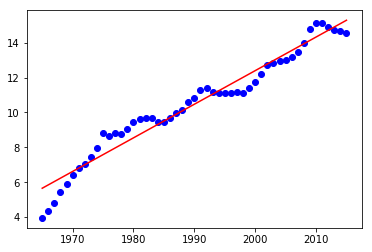

In [143]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [144]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(mse, r2)

0.408892701446 0.951595725635


In [145]:
model.score(X, y)

0.95159572563450734

In [146]:
# Use our regression model to calculate the pridictive values until 2026

columns = ['Year','Public_model']
df2 = pd.DataFrame(columns=columns)

for x in range(0,11):
    year = 2016 + x
    public =  -372.83288688 + 0.19261629 * year
    df2.loc[-1] = [year, public]
    df2.index = df2.index + 1 
    df2 = df2.sort_index() 


In [147]:
df2

,Year,Public_model
0,2026.0,17.407717
1,2025.0,17.215100
2,2024.0,17.022484
3,2023.0,16.829868
4,2022.0,16.637251
5,2021.0,16.444635
6,2020.0,16.252019
7,2019.0,16.059403
8,2018.0,15.866786
9,2017.0,15.674170


In [151]:

df3 = df.drop(df.index[11:])
df3

,Year,Public,Private
0,2026,16.64,5.99
1,2025,16.54,5.96
2,2024,16.41,5.93
3,2023,16.25,5.87
4,2022,16.08,5.81
5,2021,15.91,5.75
6,2020,15.68,5.66
7,2019,15.44,5.57
8,2018,15.21,5.48
9,2017,15.00,5.41


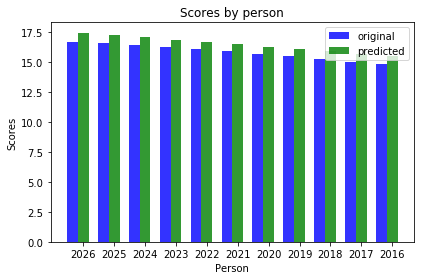

In [153]:
# Compare the original prediction vs our prediction
 
# data to plot
n_groups = 11
original = df3["Public"]
predicted = df2["Public_model"]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, original, bar_width,
                 alpha=opacity,
                 color='b',
                 label='original')
 
rects2 = plt.bar(index + bar_width, predicted, bar_width,
                 alpha=opacity,
                 color='g',
                 label='predicted')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ("2026", '2025', '2024', '2023', "2022", '2021', '2020', '2019','2018', '2017', '2016'))
plt.legend()
 
plt.tight_layout()
plt.show()